In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
outs_dict = torch.load('inference_outs_2.pth')

outs_dict['superglue_correspondences'].shape, outs_dict['flownet_correspondences'].shape

((455, 4), (3000, 4))

(array([[109.,   8.,  90.,  42.],
        [677.,   8., 616., 180.],
        [517.,   9., 297.,  17.],
        [567.,   9., 808.,  10.],
        [607.,  12., 657.,  42.],
        [656.,  12., 584., 171.],
        [326.,  13.,  81.,  10.],
        [632.,  13., 703., 212.],
        [162.,  14., 346.,  49.],
        [491.,  16., 495.,  11.]], dtype=float32),
 256.0,
 416.0,
 array([[378.      , 158.      , 376.95862 , 159.30573 ],
        [438.      ,  96.      , 438.6855  ,  95.26755 ],
        [522.      , 220.      , 538.87506 , 233.67932 ],
        [307.      , 186.      , 298.7572  , 191.28627 ],
        [341.      , 160.      , 337.14017 , 162.094   ],
        [486.      ,  49.      , 489.2308  ,  45.783543],
        [441.      , 194.      , 444.8716  , 200.93393 ],
        [502.      , 178.      , 513.3336  , 184.03937 ],
        [658.      ,  25.      , 687.789   ,  13.256032],
        [525.      ,  42.      , 531.70575 ,  37.249832]], dtype=float32),
 array([[ 61.,   8.],
        

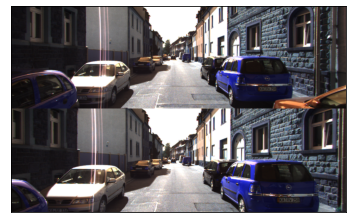

In [4]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
plt.imshow(cat_images, aspect='equal')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig('input_pair.png')

superglue_correspondences = outs_dict['superglue_correspondences']
flownet_correspondences = outs_dict['flownet_correspondences']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, flownet_correspondences[:10], outs_dict['keypoints'][0][:10]

SuperGlue keypoints and matches

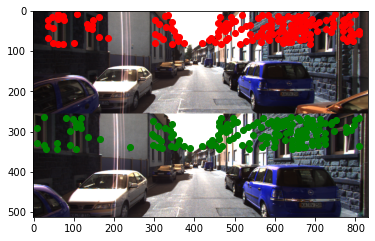

In [5]:
plt.imshow(cat_images, aspect='equal')
num_show = 150

keypoints = outs_dict['keypoints']

count = 0
for keypoint in keypoints[0]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    count += 1
    
count = 0
for keypoint in keypoints[1]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')
    count += 1
    
plt.savefig('keypoint_out.png')

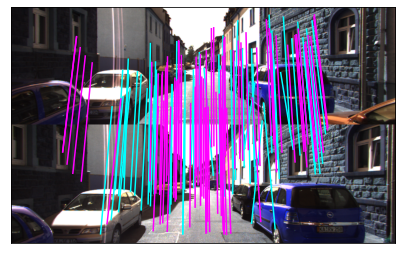

In [7]:
matches = 100
import random
plt.imshow(cat_images, aspect='equal')
plt.tight_layout()
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)

for i in range(matches):
    idx = random.randint(0, superglue_correspondences.shape[0]-1)
    if abs(superglue_correspondences[idx][0] - superglue_correspondences[idx][2]) < 30:
        plt.plot([superglue_correspondences[idx][0], superglue_correspondences[idx][2]], [superglue_correspondences[idx][1], superglue_correspondences[idx][3] + h], color='cyan')

for i in range(matches):
    idx = random.randint(0, flownet_correspondences.shape[0]-1)
    if abs(flownet_correspondences[idx][0] - flownet_correspondences[idx][2]) < 30:
        plt.plot([flownet_correspondences[idx][0], flownet_correspondences[idx][2]], [flownet_correspondences[idx][1], flownet_correspondences[idx][3] + h], color='magenta')

plt.savefig('sampled_correspondence_out.png', dpi=100)